In [9]:
from Learning_Agent import *
import numpy as np
from GPUCB import *
from GPTS import *
from GPTS_TS import *
from GPUCB1_TS import *
import Functions as f
from Enviroment import *
from Clairvoyant import *
from Classes import *
import Plots as p
import warnings
warnings.filterwarnings("ignore")  # Convergence warning concerning the parameters of the GP since we are working with very large values


In [10]:
pricing_arms=[10,15,20,25,30]

advertising_arms=np.linspace(100,397,100)
sigma = 10

In [11]:
cl=Classes()
env=Enviroment(5,100,cl)

In [12]:
runs=10
T=365
show_print=False

cum_regret_gpucb_multi=[]
cum_reward_gpucb_multi=[]
istant_regret_gpucb_multi=[]
istant_reward_gpucb_multi=[]




for r in range(runs):

    gpucb1=GPUCB1_TS(advertising_arms)
    gpucb2=GPUCB1_TS(advertising_arms)
    gpucb3=GPUCB1_TS(advertising_arms)
    
    
    
    clairv_price1=Clairvoyant_pricing(env , (1,1) ,pricing_arms)
    clairv_bid1=Clairvoyant_bid(env,(1,1), advertising_arms)
    opt_price1=clairv_price1.optimal_arm()
    opt_bid1=clairv_bid1.optimal_arm(opt_price1)
    
    clairv_price2=Clairvoyant_pricing(env , (0,1) ,pricing_arms)
    clairv_bid2=Clairvoyant_bid(env,(0,1), advertising_arms)
    opt_price2=clairv_price2.optimal_arm()
    opt_bid2=clairv_bid2.optimal_arm(opt_price2)
    
    clairv_price3=Clairvoyant_pricing(env , (0,0) ,pricing_arms)
    clairv_bid3=Clairvoyant_bid(env,(0,0), advertising_arms)
    opt_price3=clairv_price3.optimal_arm()
    opt_bid3=clairv_bid3.optimal_arm(opt_price3)

    expected_optimal_rew=clairv_bid1.expected_reward(opt_bid1,opt_price1) + clairv_bid2.expected_reward(opt_bid2,opt_price2) + clairv_bid3.expected_reward(opt_bid3,opt_price3)


    if show_print:
        print(opt_price)
        print(opt_bid)
        print(expected_optimal_rew)


    cum_reward_GPUCB=[0]
    clairvoyant_cum_reward=[0]
    cumulative_optimal_rew=[0] 
    cum_regret_GPUCB=[]
    regret_GPUCB=np.zeros(T)+expected_optimal_rew
    reward_GPUCB=[]
    



    for t in range(T):
        cumulative_optimal_rew.append(cumulative_optimal_rew[t]+expected_optimal_rew)
        
        pulled_arm_GPUCB1=gpucb1.pull_arm()
        price1=pulled_arm_GPUCB1[0]
        bid1=pulled_arm_GPUCB1[1]
        
        
        
        pulled_arm_GPUCB2=gpucb2.pull_arm()
        price2=pulled_arm_GPUCB2[0]
        bid2=pulled_arm_GPUCB2[1]


        
        pulled_arm_GPUCB3=gpucb3.pull_arm()
        price3=pulled_arm_GPUCB3[0]
        bid3=pulled_arm_GPUCB3[1]
        
        rewards_GPUCB=env.round([price1,price2,price3],  [bid1,bid2,bid3])
        
        gpucb1.update(price1, bid1 ,rewards_GPUCB["reward_class_1"] )
        rew_1=rewards_GPUCB["reward_class_1"][3]
        gpucb2.update(price2, bid2 ,rewards_GPUCB["reward_class_2"] )
        rew_2=rewards_GPUCB["reward_class_2"][3]
        gpucb3.update(price3, bid3 ,rewards_GPUCB["reward_class_3"] )
        rew_3=rewards_GPUCB["reward_class_3"][3]

        cum_reward_GPUCB.append(cum_reward_GPUCB[t]+rew_1+rew_2+rew_3)
        cum_regret_GPUCB.append(cumulative_optimal_rew[t+1]-cum_reward_GPUCB[t+1])
        regret_GPUCB[t]=regret_GPUCB[t]-(rew_1+rew_2+rew_3)
        reward_GPUCB.append(rew_1+rew_2+rew_3)
        
       # print(opt_bid,pulled_arm_GPUCB)



  

    cum_regret_gpucb_multi.append(cum_regret_GPUCB)
    cum_reward_gpucb_multi.append(cum_reward_GPUCB)
    istant_regret_gpucb_multi.append(regret_GPUCB)
    istant_reward_gpucb_multi.append(reward_GPUCB)

 

In [13]:
runs=10
T=365
show_print=False

cum_regret_gpts_multi=[]
cum_reward_gpts_multi=[]
istant_regret_gpts_multi=[]
istant_reward_gpts_multi=[]




for r in range(runs):

    gpts1=GPTS_TS(advertising_arms)
    gpts2=GPTS_TS(advertising_arms)
    gpts3=GPTS_TS(advertising_arms)
    
    
    
    clairv_price1=Clairvoyant_pricing(env , (1,1) ,pricing_arms)
    clairv_bid1=Clairvoyant_bid(env,(1,1), advertising_arms)
    opt_price1=clairv_price1.optimal_arm()
    opt_bid1=clairv_bid1.optimal_arm(opt_price1)
    
    clairv_price2=Clairvoyant_pricing(env , (0,1) ,pricing_arms)
    clairv_bid2=Clairvoyant_bid(env,(0,1), advertising_arms)
    opt_price2=clairv_price2.optimal_arm()
    opt_bid2=clairv_bid2.optimal_arm(opt_price2)
    
    clairv_price3=Clairvoyant_pricing(env , (0,0) ,pricing_arms)
    clairv_bid3=Clairvoyant_bid(env,(0,0), advertising_arms)
    opt_price3=clairv_price3.optimal_arm()
    opt_bid3=clairv_bid3.optimal_arm(opt_price3)

    expected_optimal_rew=clairv_bid1.expected_reward(opt_bid1,opt_price1) + clairv_bid2.expected_reward(opt_bid2,opt_price2) + clairv_bid3.expected_reward(opt_bid3,opt_price3)


    if show_print:
        print(opt_price)
        print(opt_bid)
        print(expected_optimal_rew)


    cum_reward_GPTS=[0]
    clairvoyant_cum_reward=[0]
    cumulative_optimal_rew=[0] 
    cum_regret_GPTS=[]
    regret_GPTS=np.zeros(T)+expected_optimal_rew
    reward_GPTS=[]
    



    for t in range(T):
        cumulative_optimal_rew.append(cumulative_optimal_rew[t]+expected_optimal_rew)
        
        pulled_arm_GPTS1=gpts1.pull_arm()
        price1=pulled_arm_GPTS1[0]
        bid1=pulled_arm_GPTS1[1]
        
        
        
        pulled_arm_GPTS2=gpts2.pull_arm()
        price2=pulled_arm_GPTS2[0]
        bid2=pulled_arm_GPTS2[1]


        
        pulled_arm_GPTS3=gpts3.pull_arm()
        price3=pulled_arm_GPUCB3[0]
        bid3=pulled_arm_GPTS3[1]
        
        rewards_GPTS=env.round([price1,price2,price3],  [bid1,bid2,bid3])
        
        gpts1.update(price1, bid1 ,rewards_GPTS["reward_class_1"] )
        rew_1=rewards_GPTS["reward_class_1"][3]
        gpts2.update(price2, bid2 ,rewards_GPTS["reward_class_2"] )
        rew_2=rewards_GPTS["reward_class_2"][3]
        gpts3.update(price3, bid3 ,rewards_GPTS["reward_class_3"] )
        rew_3=rewards_GPTS["reward_class_3"][3]

        cum_reward_GPTS.append(cum_reward_GPTS[t]+rew_1+rew_2+rew_3)
        cum_regret_GPTS.append(cumulative_optimal_rew[t+1]-cum_reward_GPTS[t+1])
        regret_GPTS[t]=regret_GPTS[t]-(rew_1+rew_2+rew_3)
        reward_GPTS.append(rew_1+rew_2+rew_3)
        
       # print(opt_bid,pulled_arm_GPUCB)



  

    cum_regret_gpts_multi.append(cum_regret_GPTS)
    cum_reward_gpts_multi.append(cum_reward_GPTS)
    istant_regret_gpts_multi.append(regret_GPTS)
    istant_reward_gpts_multi.append(reward_GPTS)

 

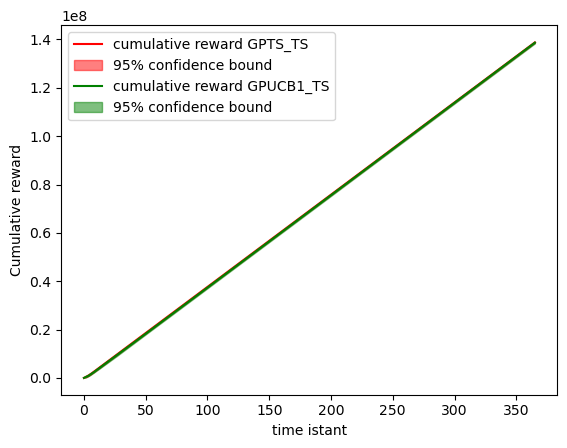

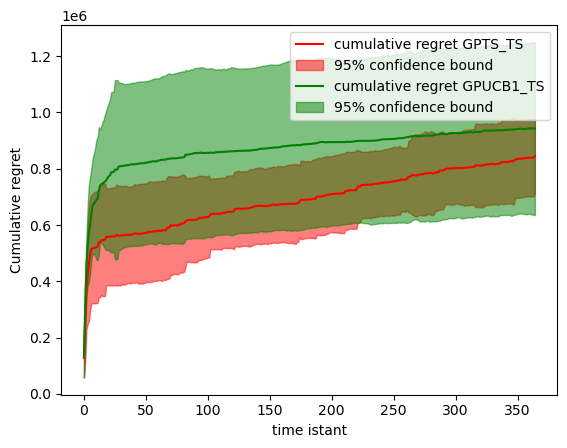

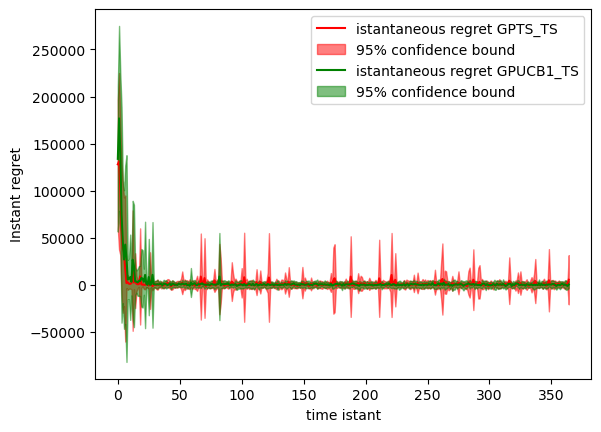

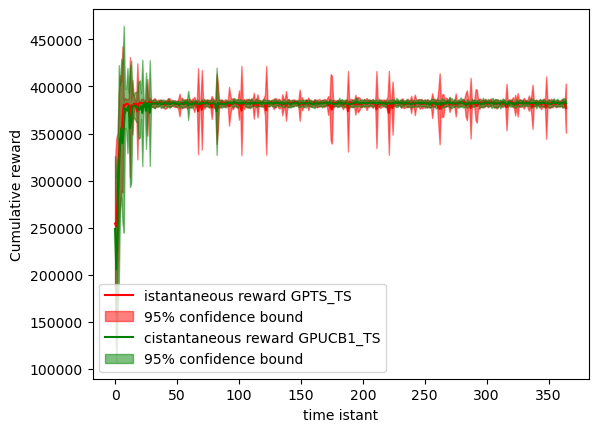

In [14]:
x=[i for i in range(T+1)]
arr1=np.array(cum_reward_gpts_multi)
arr2=np.array(cum_reward_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative reward GPTS_TS", "cumulative reward GPUCB1_TS","Cumulative reward")

x=[i for i in range(T)]
arr1=np.array(cum_regret_gpts_multi)
arr2=np.array(cum_regret_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"cumulative regret GPTS_TS", "cumulative regret GPUCB1_TS","Cumulative regret")

x=[i for i in range(T)]
arr1=np.array(istant_regret_gpts_multi)
arr2=np.array(istant_regret_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous regret GPTS_TS", "istantaneous regret GPUCB1_TS","Instant regret")

x=[i for i in range(T)]
arr1=np.array(istant_reward_gpts_multi)
arr2=np.array(istant_reward_gpucb_multi)
p.plot_comparison(x, arr1,arr2,"istantaneous reward GPTS_TS", "cistantaneous reward GPUCB1_TS","Cumulative reward")

